# SLR MID EXAM

## Kindly change the below cells from markdown to code and execute it 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import pandas as pd
from sklearn.datasets import load_boston
load = load_boston()
df = pd.DataFrame(data = load.data, columns = load.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Data Understanding (8 marks)
a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks)

d. Check for defects in the data such as missing values, null, outliers, etc. (4 marks)

In [39]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


In [33]:
df.shape

(273, 13)

In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0
CHAS,0,0.0


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64
CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
Name: 0.75, dtype: float64
CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [11]:
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

(274, 13)

<AxesSubplot:xlabel='TAX', ylabel='Count'>

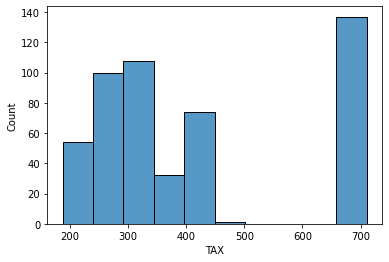

In [20]:
sns.histplot(df['TAX'])

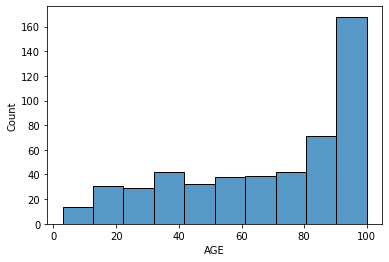

In [18]:
sns.histplot(df['AGE'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


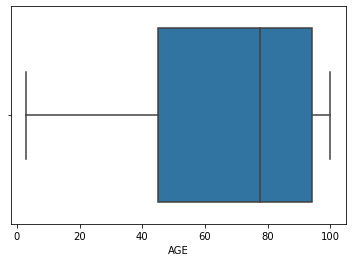

In [19]:
sns.boxplot(df['AGE'])
plt.show()

#### 2. Data Preparation (17 marks)

a. Fix the defects found above and do appropriate treatment if any. (4 marks)

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks)

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (4 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks)

In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(274, 13)

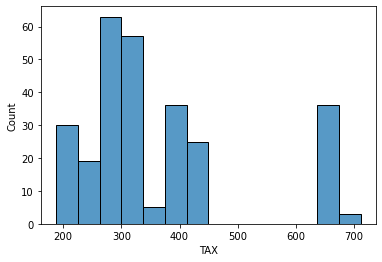

In [23]:
sns.histplot(df['TAX'])
plt.show()

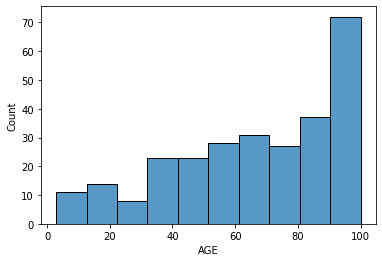

In [24]:
sns.histplot(df['AGE'])
plt.show()

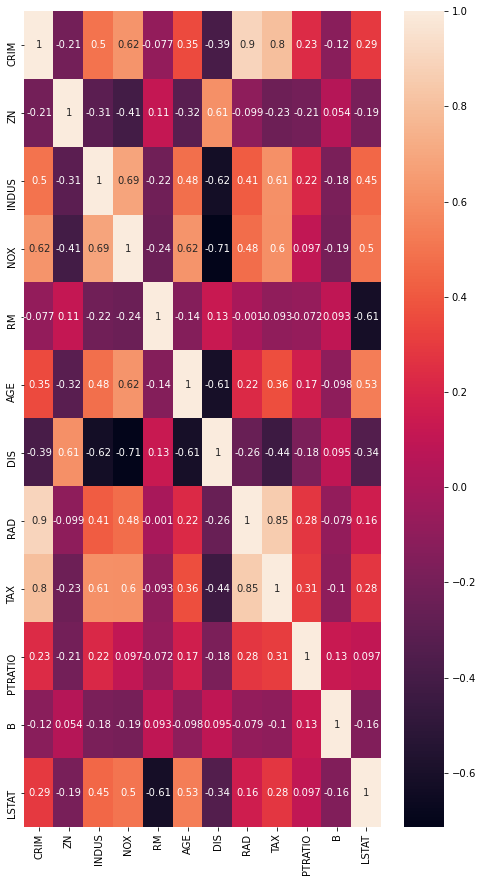

In [44]:
plt.figure(figsize=(8,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif["Features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)

   Features         VIF
0      CRIM    8.952203
1        ZN    2.029018
2     INDUS   10.059023
3       NOX  105.896305
4        RM  261.566943
5       AGE   15.879938
6       DIS   18.813406
7       RAD   19.828620
8       TAX   42.287480
9   PTRATIO  140.789192
10        B  501.918319
11    LSTAT   13.582731


In [49]:
df=np.sqrt(df)

In [50]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.079498,4.242641,1.519868,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591
1,0.165257,0.000000,2.658947,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243
2,0.165197,0.000000,2.658947,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486
3,0.179917,0.000000,1.476482,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643
4,0.262774,0.000000,1.476482,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679


In [51]:
vif = pd.DataFrame()
vif["Features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)

   Features         VIF
0      CRIM    7.249487
1        ZN    3.312664
2     INDUS   38.202669
3       NOX  320.548736
4        RM  341.158651
5       AGE   50.804746
6       DIS   58.888448
7       RAD   34.238982
8       TAX  156.610830
9   PTRATIO  337.301204
10        B   34.879805
11    LSTAT   38.635861


In [54]:
df=df.drop('CRIM',axis=1)

In [55]:
vif = pd.DataFrame()
vif["Features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)

   Features         VIF
0        ZN    3.282329
1     INDUS   38.085401
2       NOX  319.886086
3        RM  340.764284
4       AGE   50.750630
5       DIS   56.379332
6       RAD   26.430801
7       TAX  155.864936
8   PTRATIO  337.280573
9         B   33.597220
10    LSTAT   37.242638


In [60]:
X, y = df.drop('LSTAT',axis=1), df['LSTAT']

In [56]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,Y_test=train_test_split(X,y,test_size = 0.30, random_state = 10)

### 3. Model Building (25 marks)

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not. (6 marks)

b. Check for multi-collinearity and treat the same. (4 marks)

c. How would you improve the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (7 marks)

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)

e. What changes from the base model had the most effect on model performance? (4 marks)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [81]:
MLRmodel=sm.OLS(y,X).fit()
print(MLRmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                  LSTAT   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1798.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        08:14:10   Log-Likelihood:                         -444.86
No. Observations:                 506   AIC:                                      909.7
Df Residuals:                     496   BIC:                                      952.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [77]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_pred,Y_test))
print('RMSE:',rmse)

RMSE: 0.5750015404614152


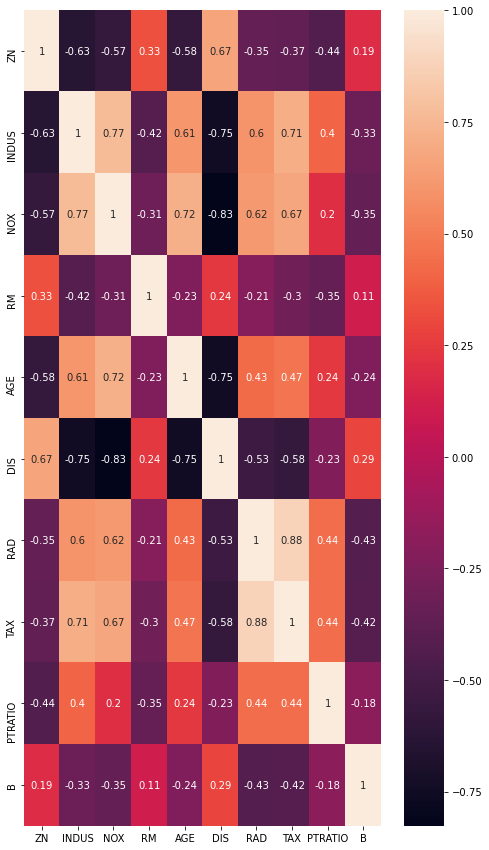

In [86]:
plt.figure(figsize=(8,15))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [87]:
from sklearn.linear_model import Lasso

In [95]:
lasso=Lasso(alpha=0.5)
lasso.fit(x_train,y_train)
lasso_train=lasso.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(lasso_train,y_train))
print('RMSE:',rmse_train)
lasso_test=lasso.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(lasso_test,Y_test))
print('RMSE:',rmse_test)

RMSE: 0.7436514937562209
RMSE: 0.8187678125236003


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [97]:
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_train, 
                            y = y_train, 
                            cv = 2, 
                            scoring = 'r2',
                         )

In [98]:
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4))  
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.61299884 0.6729696 ]

Minimum score obtained:  0.613
Maximum score obtained:  0.673
Average score obtained:  0.643


In [ ]:
#Variable NOX affecting the most